## Tensorflow Regression

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
x_data = np.linspace(0.0,10.0,1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [8]:
noise

array([ 0.63559504, -0.87348986,  1.47175495, ...,  0.47615668,
        0.04764251,  0.1305187 ])

y = mx + c

b = 5

In [10]:
y_true = (0.5 * x_data ) + 5 + noise

In [11]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [17]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [19]:
my_data = pd.concat([x_df,y_df],axis=1)

In [20]:
my_data.head()

,X Data,Y
0,0.00000,5.635595
1,0.00001,4.126515
2,0.00002,6.471765
3,0.00003,3.754395
4,0.00004,4.491853


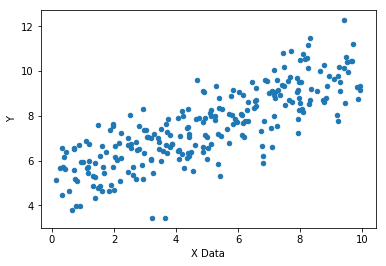

In [23]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [24]:
batch_size = 8

In [25]:
np.random.rand(2)

array([ 0.99488597,  0.6785401 ])

In [27]:
m = tf.Variable(0.99)
b = tf.Variable(0.67)

In [28]:
xph = tf.placeholder(tf.float32,[batch_size])

In [30]:
yph = tf.placeholder(tf.float32,[batch_size])

In [31]:
y_model = m * xph + b

In [32]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [34]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [35]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
        model_m , model_b = sess.run([m,b])

In [40]:
model_m

0.55158561

In [41]:
model_b

4.9923649

In [42]:
 y_hat = x_data * model_m + model_b

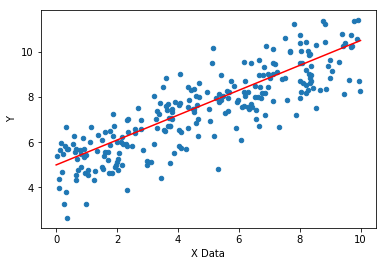

In [43]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')